***
**Using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients.**
***
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [167]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [168]:
# Convert the sklearn.dataset cancer to a DataFrame.
cancerdf=pd.concat([pd.DataFrame(data=cancer['data']),pd.Series(cancer['target'])],axis=1)
cancerdf.set_axis(np.append(cancer['feature_names'],'target'), axis=1, inplace=True)
# Split the DataFrame into X (the data) and y (the labels).
X=cancerdf.iloc[:,:cancerdf.shape[1]-1]
y=cancerdf.loc[:,cancerdf.columns[cancerdf.shape[1]-1]]

# Using train_test_split, to split X and y into training and test sets (X_train, X_test, y_train, and y_test).
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with X_train, y_train
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

In [178]:
# predict the class label using the mean value for each feature
means = cancerdf.mean()[:-1].values.reshape(1, -1)
predict_cancer[knn.predict(means)[0]]

'Benign'

In [190]:
# predict the class labels for the test set X_test.
for idx in range(x.size):
    print(predict_cancer[knn.predict(X_test)[idx]])

Benign
Benign
Benign
Malignant
Benign
Benign
Benign
Benign
Benign
Benign
Malignant
Benign
Benign
Benign
Malignant
Malignant
Benign
Malignant
Malignant
Malignant
Malignant
Benign
Benign
Benign
Malignant
Benign
Benign
Benign
Benign
Malignant
Benign
Malignant
Benign
Malignant
Benign
Malignant
Benign
Malignant
Benign
Malignant
Malignant
Benign
Malignant
Benign
Malignant
Malignant
Benign
Benign
Benign
Malignant
Malignant
Benign
Malignant
Benign
Benign
Benign
Benign
Benign
Benign
Malignant
Malignant
Malignant
Benign
Benign
Malignant
Benign
Malignant
Malignant
Malignant
Benign
Benign
Malignant
Benign
Benign
Malignant
Benign
Benign
Benign
Benign
Benign
Malignant
Malignant
Malignant
Benign
Malignant
Benign
Benign
Benign
Malignant
Malignant
Benign
Malignant
Benign
Malignant
Benign
Benign
Malignant
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Malignant
Benign
Malignant
Benign
Malignant
Benign
Benign
Malignant
Malignant
Benign
Benign
Benign
Malignant
Benign
Benign
Benign
Benign
Benign
Benign
B

In [192]:
# Find the score (mean accuracy) of your knn classifier using X_test and y_test.
knn.score(X_test, y_test)

0.916083916083916

<IPython.core.display.Javascript object>


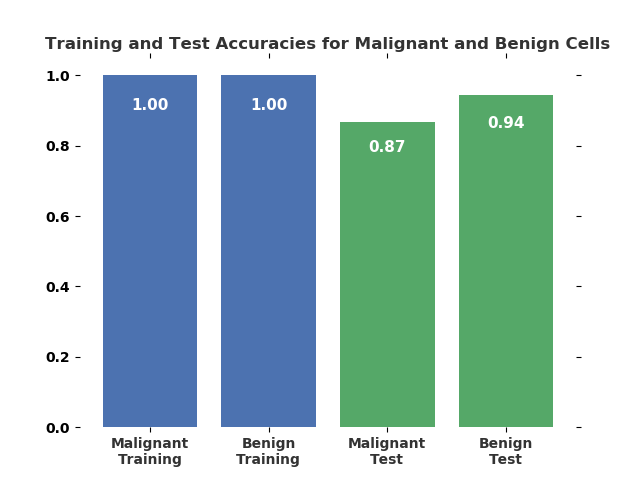

In [195]:
# visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib notebook

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart. Just x-axis vs y-axis.. coz we know we have four scores, we say there are 4 values 
    # for x axis
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)
accuracy_plot()     